# 💡 K Nearest Neighbor

In [12]:
#Let's install mglearn library
pip install mglearn

     ------------------------------------ 581.4/581.4 kB 500.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [224]:
#Let's import the library we're using 
import numpy as np
from sklearn.impute import KNNImputer
import mglearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# 📍 KNN Imputer

In [225]:
#Let's examine that what is KNNimputer
#Let's create example dataset with missing values
X = np.array([[1, 2, np.nan],
              [3, np.nan, 4],
              [5, 6, 7],
              [np.nan, 8, 9]])

imputer = KNNImputer(n_neighbors=87)
X_imputed = imputer.fit_transform(X)
print("· Original Dataset:")
print(X)
print("\n· Imputed Dataset:")
print(X_imputed)

· Original Dataset:
[[ 1.  2. nan]
 [ 3. nan  4.]
 [ 5.  6.  7.]
 [nan  8.  9.]]

· Imputed Dataset:
[[1.         2.         6.66666667]
 [3.         5.33333333 4.        ]
 [5.         6.         7.        ]
 [3.         8.         9.        ]]


# 📍 K Neighbors Classifier

In [226]:
#Let's import dataset
X,y = mglearn.datasets.make_forge()

In [234]:
#Let's split dataset to train and test
x_train , x_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2)

In [235]:
# Let's set the number of neighbors equal to 3   
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [236]:
#Accuracy score equal to knn score
print("·Accuracy Score: " ,accuracy_score(y_test,y_predict))
print("·KNN Score: " , knn.score(x_test,y_test))

·Accuracy Score:  0.5
·KNN Score:  0.9298245614035088


# 📋 Cancer Dataset

In [237]:
#Let's load cancer dataset 
cancer = load_breast_cancer()

In [238]:
#Let's look at column names
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [239]:
#Let's determine target and explanotory variables 
y = cancer['target']
X = cancer['data']

In [240]:
x_train , x_test , y_train , y_test = train_test_split(X,y,random_state = 42 , stratify = y , test_size = 0.2)

In [241]:
#Let's fit x_train and y_train to algorithm
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [242]:
#Let's look at knn score
knn.score(x_test,y_test)

0.9298245614035088

In [243]:
#Let's examine that which count of neighbors model is best
test_score = []
train_score = []
ns = np.arange(1,11)

In [244]:
#Let's check number of neighbors from 1 to 10 
for n in ns:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

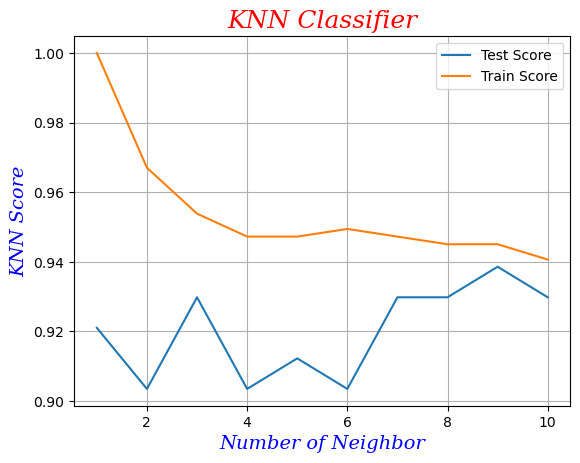

In [245]:
#Let's look at score difference as visual
fonty = {'color' : 'r', 'fontsize' : 18 , 'fontfamily': 'serif','fontstyle' : 'italic'}
fontx = {'color' : 'b', 'fontsize' : 14 , 'fontfamily': 'serif','fontstyle' : 'italic'}

plt.plot(list(ns), test_score, label='Test Score')
plt.plot(list(ns), train_score, label='Train Score')
plt.grid()
plt.title('KNN Classifier',fontdict = fonty)
plt.ylabel('KNN Score', fontdict = fontx)
plt.xlabel('Number of Neighbor',fontdict = fontx) 
plt.legend()
plt.show()

In [246]:
#Let's examine which point has the minimum difference
mindiff = float('inf')
min_index = 0
count = 1
test_score_max = 0

for i, y in enumerate(zip(test_score, train_score)):
    diff = y[1] - y[0]
    if diff < mindiff:
        mindiff = diff
        min_index = count
        test_score_max = y[0]
    count += 1

print("·Minimum Difference:", mindiff)
print("·Number of Neighbors:", min_index)
print("·The Best Test Score: ",test_score_max)

·Minimum Difference: 0.0064584538268748215
·Number of Neighbors: 9
·The Best Test Score:  0.9385964912280702


# 💡 KNN Regression

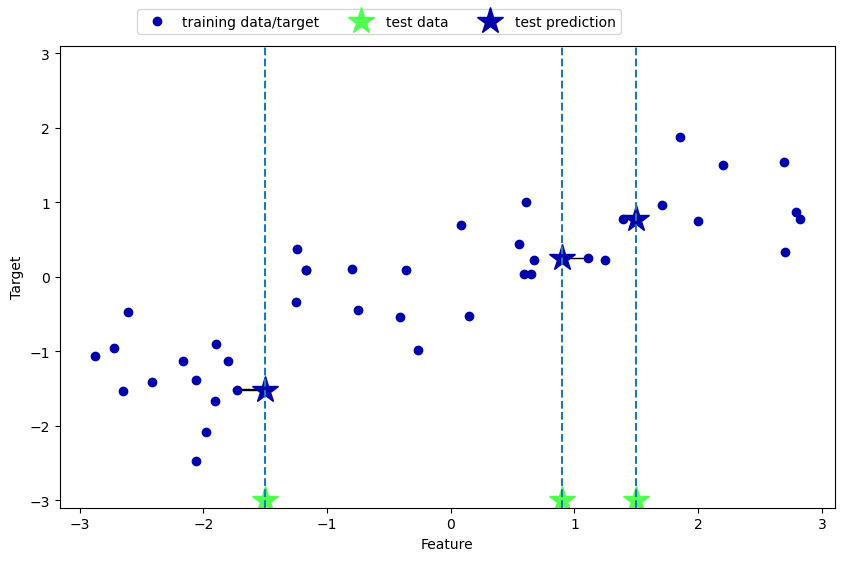

In [247]:
#Let's show knn regression plot with 1 neighbor
mglearn.plots.plot_knn_regression(n_neighbors = 1)

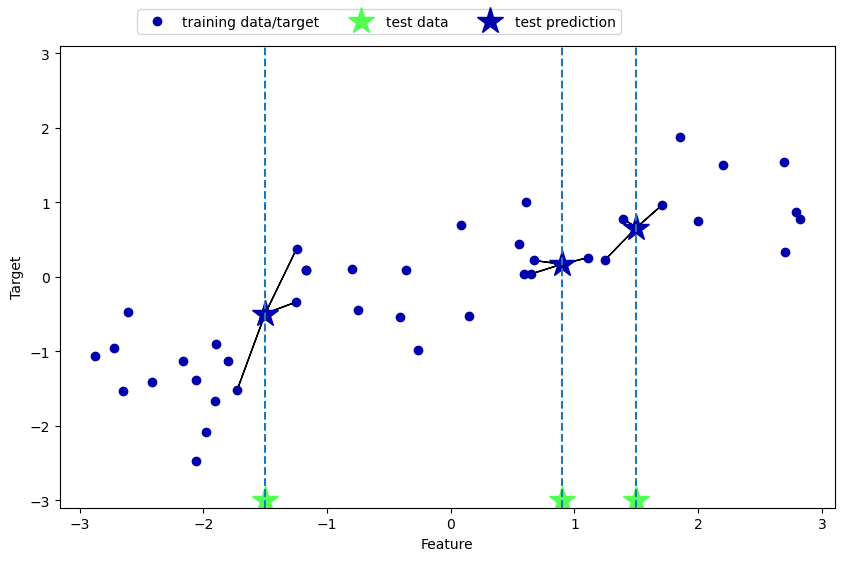

In [248]:
#Let's show knn regression plot with 3 neighbor
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [249]:
#Let's get 100 samples from make wave datasets
X,y = mglearn.datasets.make_wave(n_samples = 100) 
x_train , x_test ,y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2)

In [250]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

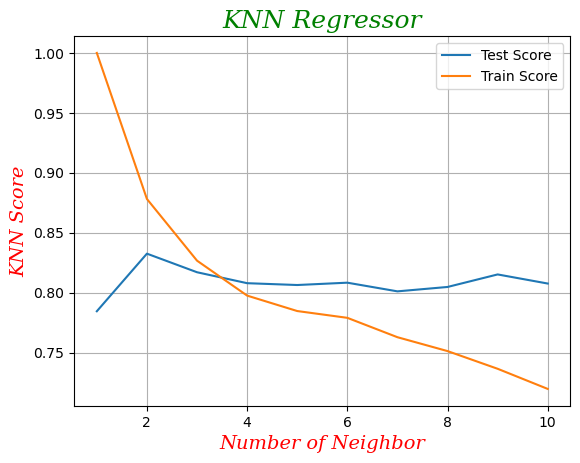

In [251]:
#Let's examine that which count of neighbors model is best
test_score = []
train_score = []
ns = np.arange(1,11)

#Let's check number of neighbors from 1 to 10 
for n in ns:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

#Let's look at score difference as visual
fonty = {'color' : 'green', 'fontsize' : 18 , 'fontfamily': 'serif','fontstyle' : 'italic'}
fontx = {'color' : 'Red', 'fontsize' : 14 , 'fontfamily': 'serif','fontstyle' : 'italic'}

plt.plot(list(ns), test_score, label='Test Score')
plt.grid()
plt.plot(list(ns), train_score, label='Train Score')
plt.title('KNN Regressor',fontdict = fonty)
plt.ylabel('KNN Score', fontdict = fontx)
plt.xlabel('Number of Neighbor',fontdict = fontx) 
plt.legend()
plt.show()

In [252]:
#Let's examine which point has the minimum difference
mindiff = float('inf')
min_index = 0
count = 1
test_score_max = 0

for i, y in enumerate(zip(test_score, train_score)):
    diff = np.abs(y[1] - y[0])
    if diff < mindiff:
        mindiff = diff
        min_index = count
        test_score_max = y[0]
    count += 1

print("·Minimum Difference:", mindiff)
print("·Number of Neighbors:", min_index)
print("·The Best Test Score: ",test_score_max)

·Minimum Difference: 0.009659046748517475
·Number of Neighbors: 3
·The Best Test Score:  0.8170030677433864


# 📝The End